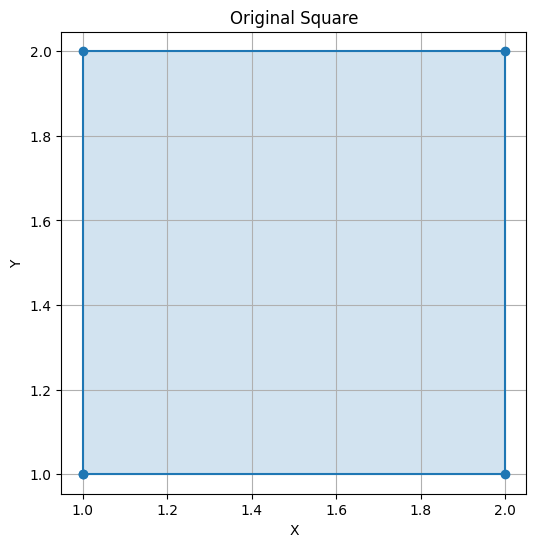

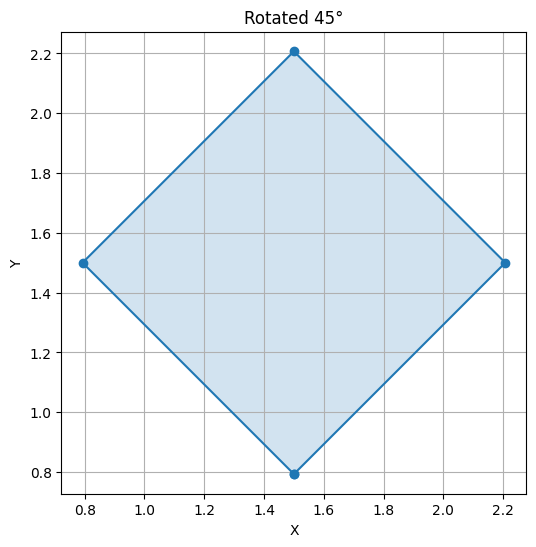

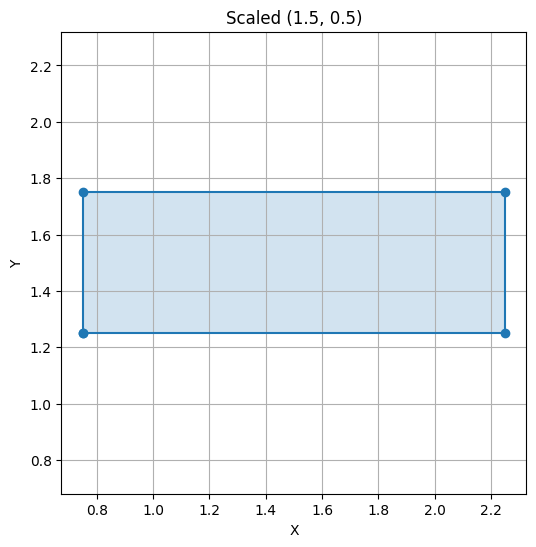

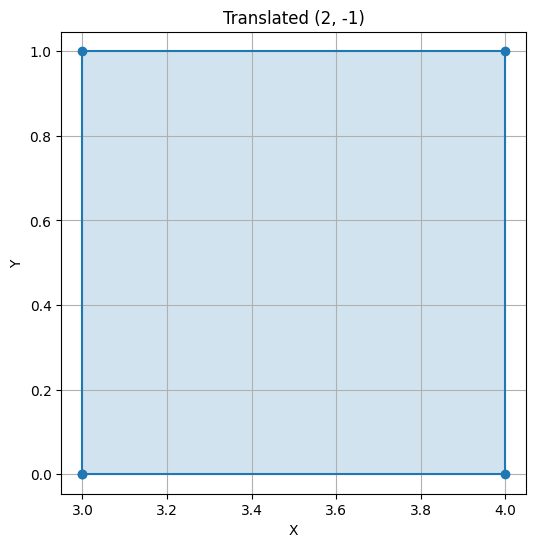

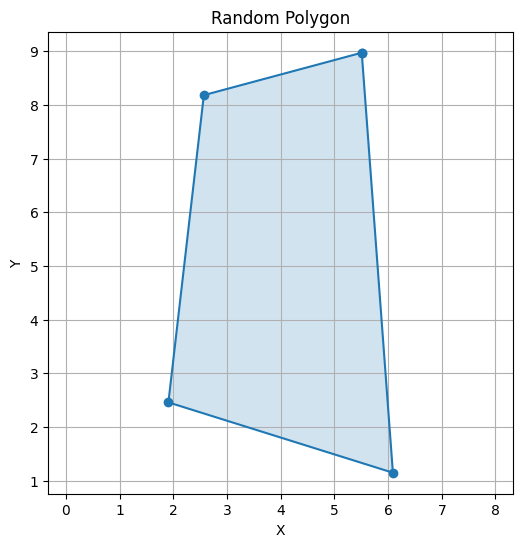

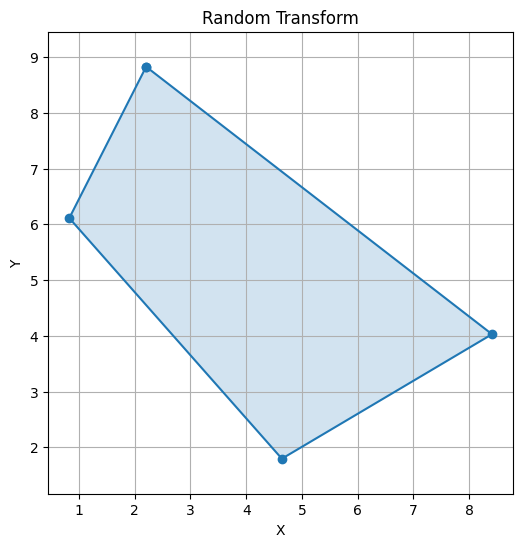

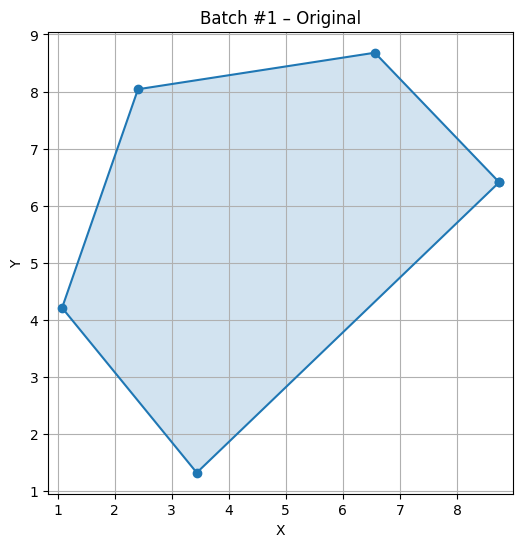

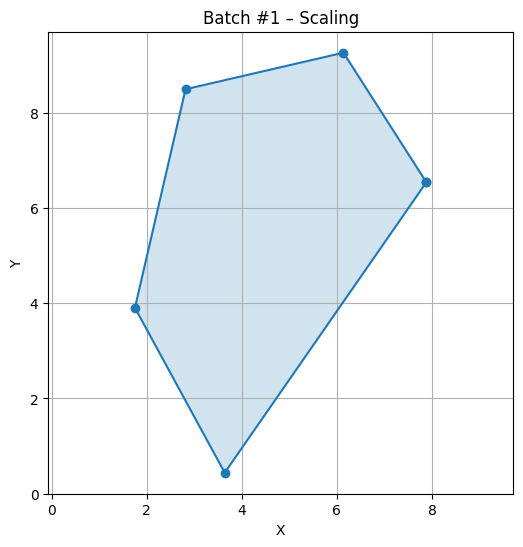

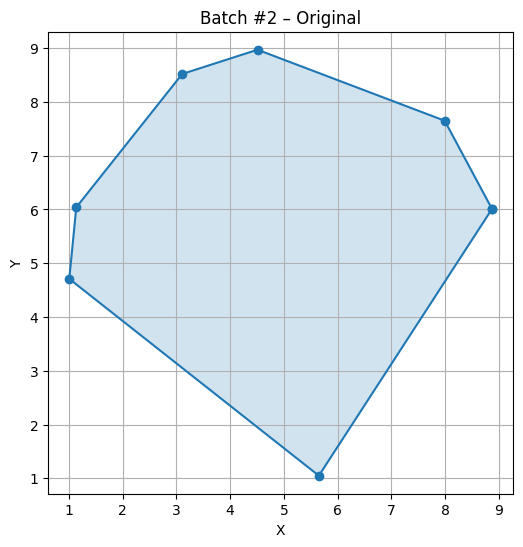

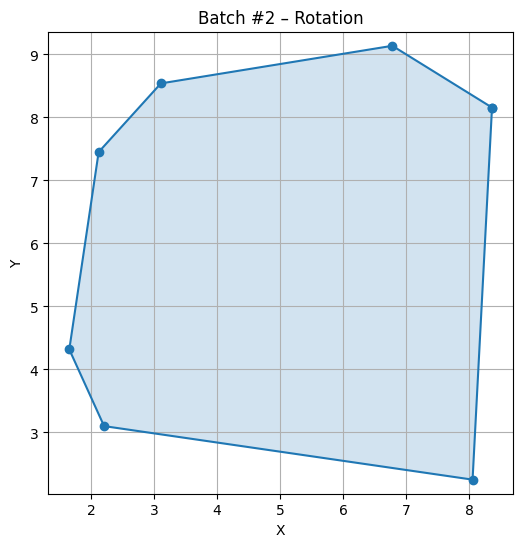

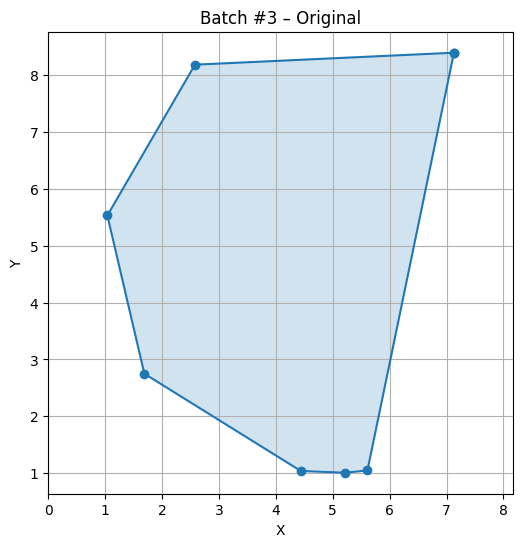

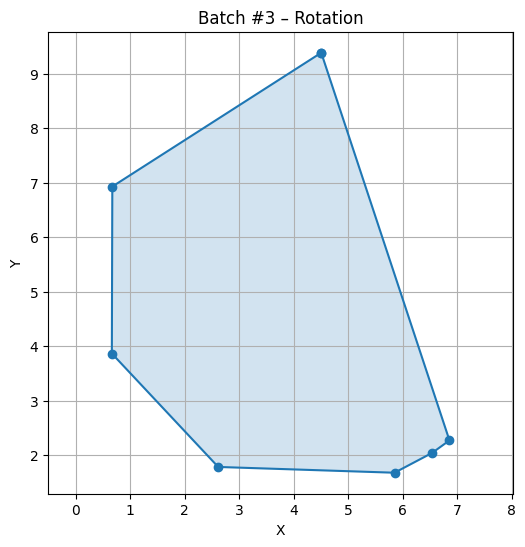

In [2]:
import os
os.chdir("../../../src")

import random
from data import PolygonSentenceReader, Polygon
from utils import plot_polygon

polygon_reader = PolygonSentenceReader(
    batch_size=1,
    max_num_context=10,
    max_seq_len=512,
    min_num_sides=3,
    max_num_sides=8,
    testing=True,
)

square = Polygon([(1, 1), (2, 1), (2, 2), (1, 2)], [1, 1, 1, 1], [90, 90, 90, 90])
plot_polygon(square.vertices, "Original Square")

# Rotation
rot = polygon_reader._transform_polygon(square, "rotation", {"angle": 45})
plot_polygon(rot.vertices, "Rotated 45°")

# Scaling
scl = polygon_reader._transform_polygon(
    square, "scaling", {"scale_x": 1.5, "scale_y": 0.5}
)
plot_polygon(scl.vertices, "Scaled (1.5, 0.5)")

# Translation
tr = polygon_reader._transform_polygon(square, "translation", {"dx": 2.0, "dy": -1.0})
plot_polygon(tr.vertices, "Translated (2, -1)")

# Test on a random polygon
rand_poly = polygon_reader.generate_polygon()
plot_polygon(rand_poly.vertices, "Random Polygon")

# Random transform
rand_t = polygon_reader._transform_polygon(rand_poly)  # picks random type & params
plot_polygon(rand_t.vertices, "Random Transform")

# Try a batch of random tests
for i in range(3):
    p = polygon_reader.generate_polygon()
    t_type, _ = random.choice(
        [
            ("rotation", {"angle": 30}),
            ("scaling", {"scale_x": 0.8, "scale_y": 1.2}),
            ("translation", {"dx": -1, "dy": 1}),
        ]
    )
    p2 = polygon_reader._transform_polygon(p, t_type, _)
    plot_polygon(p.vertices, f"Batch #{i+1} – Original")
    plot_polygon(p2.vertices, f"Batch #{i+1} – {t_type.capitalize()}")
